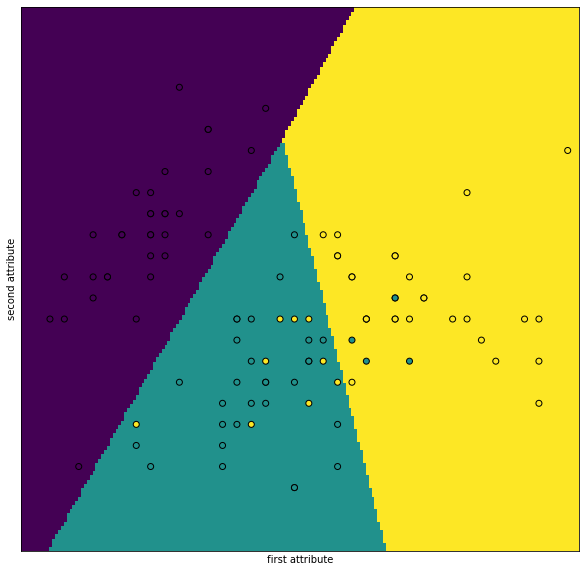

training accuracy:  0.8285714285714286


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib as plt

iris_dataset = datasets.load_iris()

features = iris_dataset.data[:, :2]
X_train, X_test, y_train, y_test = train_test_split(features, iris_dataset.target, test_size=0.3, shuffle= True)

logreg = LogisticRegression(C=1000000)
logreg.fit(X_train, y_train)

x_min = features[:, 0].min() - 0.2
x_max = features[:, 0].max() + 0.1
y_min = features[:, 1].min() - 0.1
y_max = features[:, 1].max() + 0.1

h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pyplot.figure(1, figsize=(10, 10))
plt.pyplot.pcolormesh(xx, yy, Z)

plt.pyplot.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.pyplot.xlabel('first attribute')
plt.pyplot.ylabel('second attribute')

plt.pyplot.xlim(xx.min(), xx.max())
plt.pyplot.ylim(yy.min(), yy.max())
plt.pyplot.xticks(())
plt.pyplot.yticks(())

plt.pyplot.show()

train_pre = logreg.predict(X_train)
train_acc = (train_pre == y_train).sum()/len(y_train)
print("training accuracy: ", train_acc)



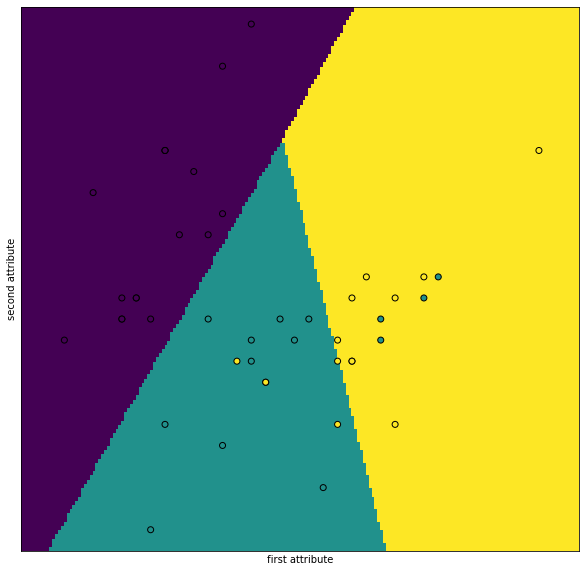

test accuracy:  0.8222222222222222


In [50]:
# tests
plt.pyplot.figure(1, figsize=(10, 10))
plt.pyplot.pcolormesh(xx, yy, Z)

plt.pyplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k')
plt.pyplot.xlabel('first attribute')
plt.pyplot.ylabel('second attribute')

plt.pyplot.xlim(xx.min(), xx.max())
plt.pyplot.ylim(yy.min(), yy.max())
plt.pyplot.xticks(())
plt.pyplot.yticks(())

plt.pyplot.show()

test_pre = logreg.predict(X_test)
test_acc = (test_pre == y_test).sum()/len(y_test)
print("test accuracy: ", test_acc)

In [54]:
from sklearn.metrics import confusion_matrix

training_cmatrix = confusion_matrix(y_train, train_pre)
print("training confusion matrix:")
print(training_cmatrix)

test_cmatrix = confusion_matrix(y_test, test_pre)
print("test confusion matrix:")
print(test_cmatrix)

training confusion matrix:
[[33  0  0]
 [ 0 28  8]
 [ 0 10 26]]
test confusion matrix:
[[17  0  0]
 [ 0 10  4]
 [ 0  4 10]]
